<a href="https://colab.research.google.com/github/AnchitSharma/Data_Analysis_using_datasets/blob/master/basic_analytics_on_sampleSuperstore_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statement: You are the business owner of the retail firm and want to see how your company is performing.
You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data?

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Articles/SampleSuperstore.txt"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(path)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [7]:
# data-types of columns
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# some basic info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Columns with object type, categorical data

In [27]:
data.select_dtypes(include='object').columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [25]:
# checking for null-values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Let's check Sales and Profit w.r.t various factors

In [11]:
sales_and_profit_segment = data.groupby(by= "Segment").sum().loc[:, ["Sales", "Profit"]]
sales_and_profit_segment = round(sales_and_profit_segment, 2)
sales_and_profit_segment

,Sales,Profit
Segment,,
Consumer,1161401.34,134119.21
Corporate,706146.37,91979.13
Home Office,429653.15,60298.68


In [15]:
sales_and_profit_region = data.groupby(by="Region").sum().loc[:, ["Sales", "Profit"]]
sales_and_profit_region = round(sales_and_profit_region, 2)
sales_and_profit_region.sort_values(by = "Sales", axis=0, ascending=False)

,Sales,Profit
Region,,
West,725457.82,108418.45
East,678781.24,91522.78
Central,501239.89,39706.36
South,391721.91,46749.43


In [16]:
sales_and_profit_category = data.groupby(by = "Category").sum().loc[:, ["Sales", "Profit"]]
sales_and_profit_category = round(sales_and_profit_category, 2)
sales_and_profit_category

,Sales,Profit
Category,,
Furniture,741999.80,18451.27
Office Supplies,719047.03,122490.80
Technology,836154.03,145454.95


In [20]:
sales_and_profit_subcategory = data.groupby(by="Sub-Category").sum().loc[:, ["Sales", "Profit"]]
sales_and_profit_subcategory = round(sales_and_profit_subcategory, 2)
sales_and_profit_subcategory.sort_values(by="Sales", axis=0, ascending=False)

,Sales,Profit
Sub-Category,,
Phones,330007.05,44515.73
Chairs,328449.10,26590.17
Storage,223843.61,21278.83
Tables,206965.53,-17725.48
Binders,203412.73,30221.76
Machines,189238.63,3384.76
Accessories,167380.32,41936.64
Copiers,149528.03,55617.82
Bookcases,114880.00,-3472.56


<Figure size 720x504 with 0 Axes>

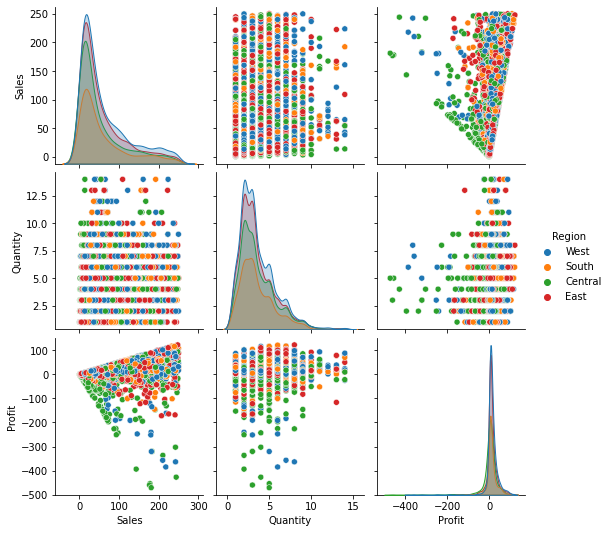

In [36]:
plt.figure(figsize=(10, 7))
sns.pairplot(x, hue="Region", diag_kind="kde")

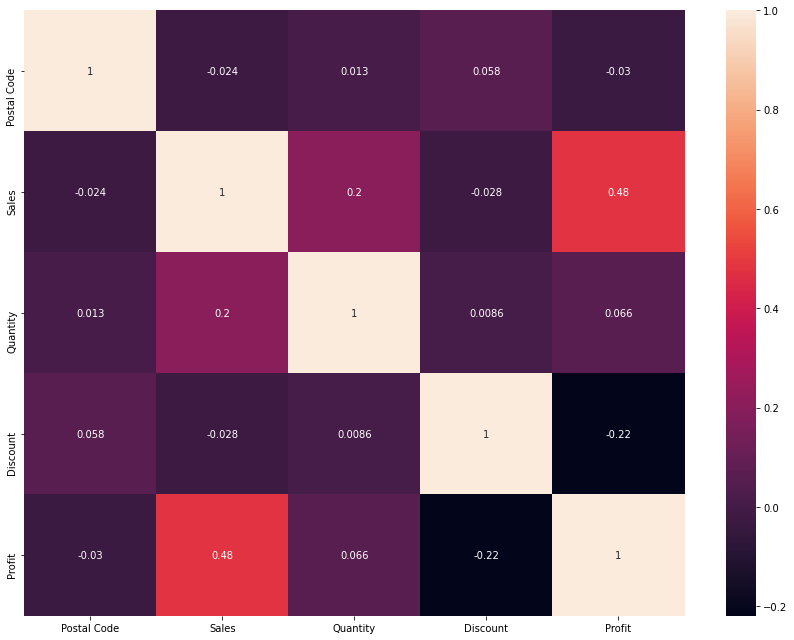

In [22]:
# Plotting heatmap to visualise correlation among features
plt.figure(figsize=(12, 9))
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()

In [29]:
store = data.drop(labels=["Postal Code", "Discount"], axis=1)
store.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,2.5164


In [30]:
store.describe()

,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


## Checking Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


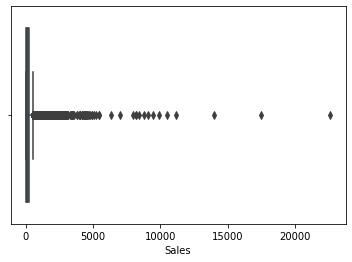

In [31]:
sns.boxplot(store.Sales)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


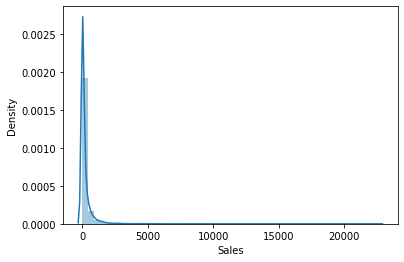

In [32]:
sns.distplot(store.Sales, kde=True)

In [33]:
max(store.Sales)

22638.48

## Removing Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


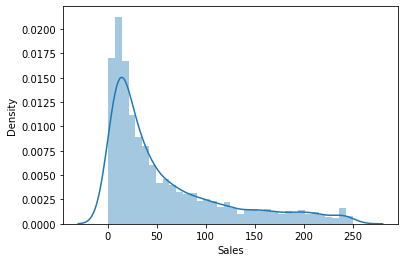

In [34]:
x = store[store['Sales'] < 250.000 ]

sns.distplot(x.Sales, kde=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


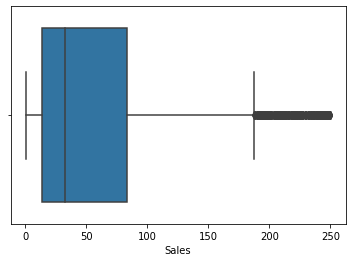

In [35]:
sns.boxplot(x.Sales)

## VISUALIZING

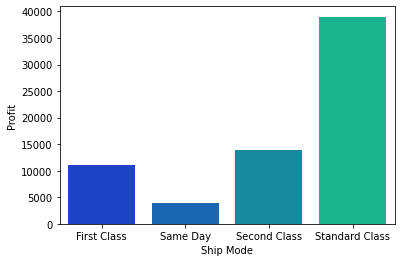

In [42]:
fig = x.groupby('Ship Mode').sum().reset_index()
sns.barplot(x = "Ship Mode", y = 'Profit', data = fig, palette='winter')

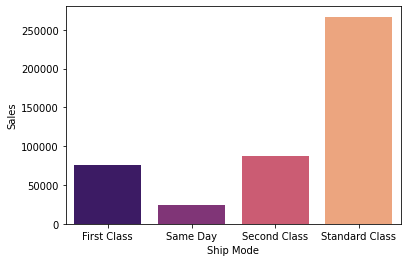

In [43]:
fig = x.groupby('Ship Mode').sum().reset_index()
sns.barplot(x = 'Ship Mode', y = 'Sales', data = fig , palette='magma')

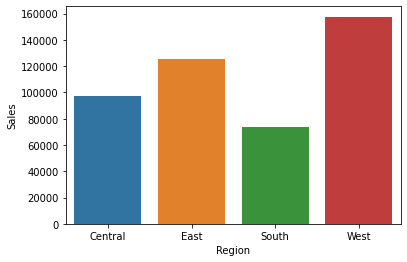

In [44]:
fig = x.groupby('Region').sum().reset_index()
sns.barplot(x = 'Region', y = 'Sales', data=fig)

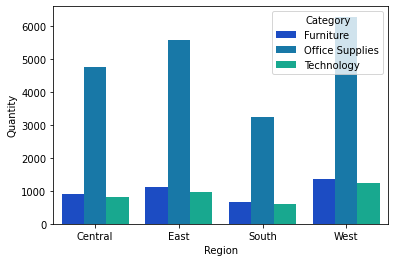

In [45]:
fig1 = x.groupby(['Region', 'Category']).sum().reset_index()
sns.barplot(x = 'Region', y = 'Quantity', hue='Category', data=fig1, palette='winter')

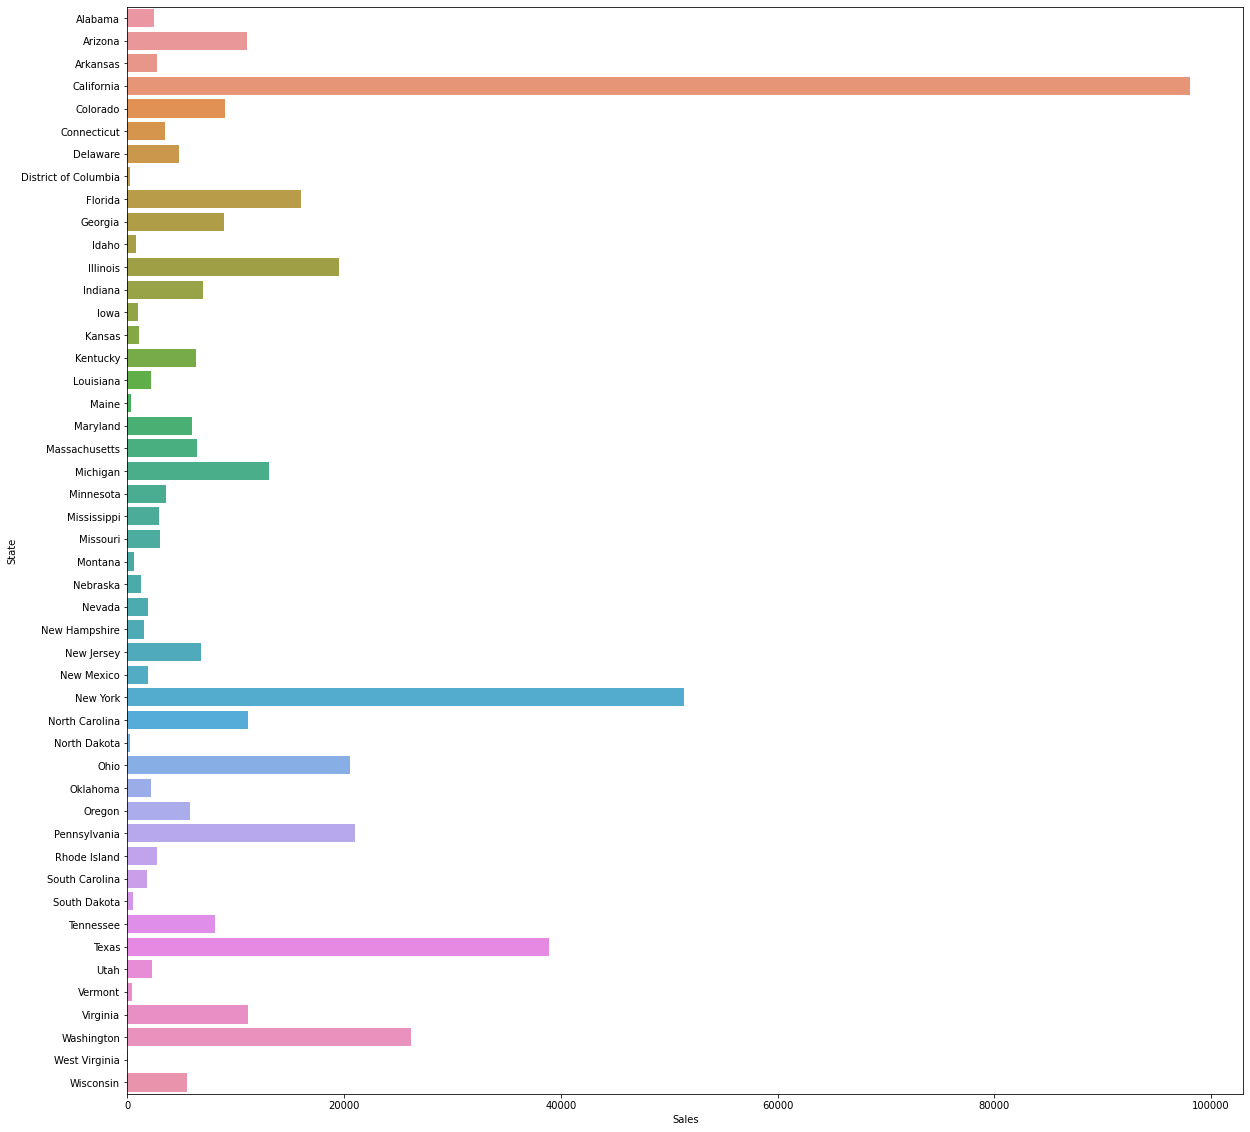

In [46]:
plt.figure(figsize=(20,20))
fig = x.groupby('State').sum().reset_index()
sns.barplot(x = 'Sales', y = 'State', data= fig)
sns.set_style('whitegrid')

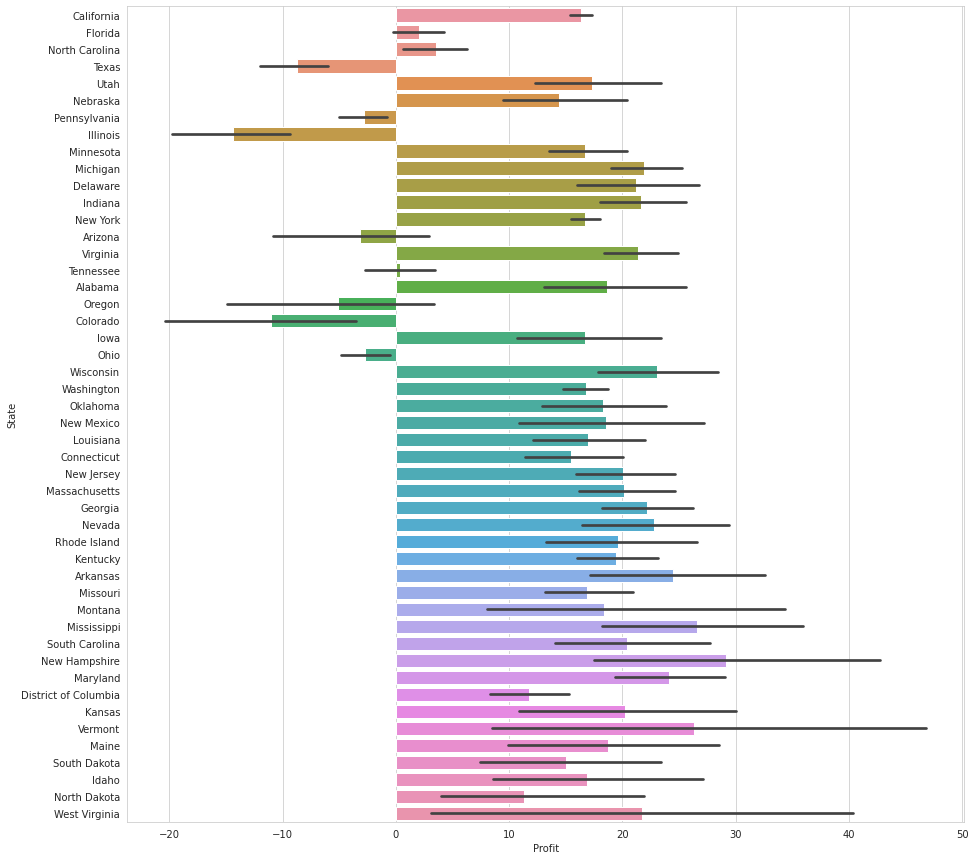

In [47]:
plt.figure(figsize=(15,15))
fig = x.groupby('State').sum().reset_index()
sns.barplot(x='Profit', y='State', data=x)

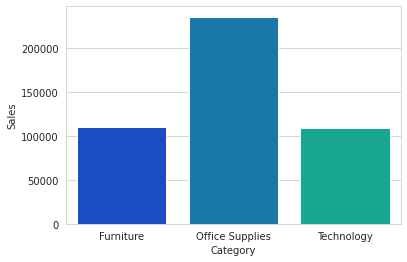

In [48]:
grouped1 = x.groupby('Category').sum().reset_index()
sns.barplot(x='Category', y='Sales', data=grouped1, palette='winter')

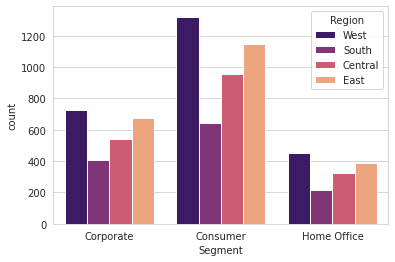

In [49]:
sns.countplot(x = 'Segment', hue='Region', data=x, palette='magma')

In [52]:
grouped = x.groupby('City').sum().reset_index()
grouped.sort_values('Sales', ascending=False).head(10)

,City,Sales,Quantity,Profit
317,New York City,42285.6460,2373,11586.1852
257,Los Angeles,36132.8720,1987,8633.7609
421,San Francisco,25397.9030,1487,7187.5085
434,Seattle,21999.1900,1143,5518.0546
359,Philadelphia,18215.2400,1408,-1062.5400
201,Houston,15361.9906,1133,-2215.8600
77,Chicago,12761.7020,895,-3865.0507
91,Columbus,9891.1410,646,1546.8175
420,San Diego,8992.9180,444,2391.7487
446,Springfield,7305.5690,466,905.3993


## Top 10 subcategory vs quantity

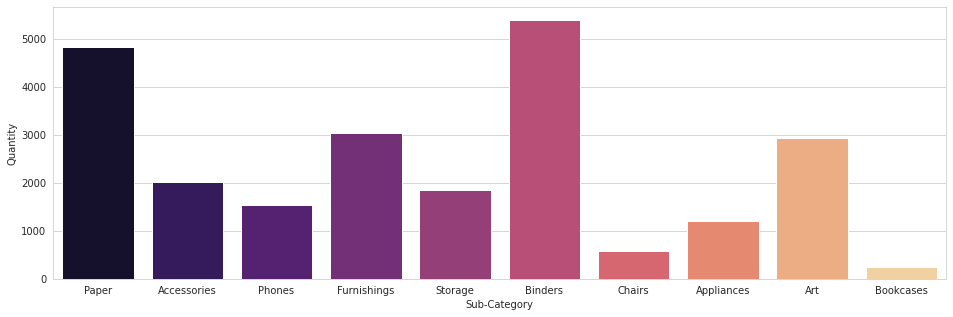

In [55]:
grouped1 = x.groupby('Sub-Category').sum().reset_index()
z = grouped1.sort_values(by='Sales', ascending=False).head(10)
plt.figure(figsize=(16, 5))
sns.barplot(x = 'Sub-Category', y = 'Quantity', data=z, palette= 'magma')

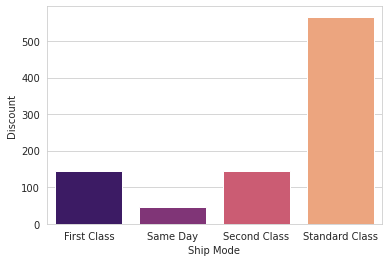

In [56]:
z = data[data['Profit']<0]
z = z.groupby('Ship Mode').sum().reset_index()
sns.barplot(x = 'Ship Mode', y = 'Discount', data = z, palette='magma')